### Lab9. Employee Hopping Prediction using Random Forests

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import precision_score, recall_score,accuracy_score,roc_auc_score,classification_report,f1_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Step1. [Understand Data]. 
####  Using Pandas, import “Employee_Hopping.csv ” file and print properties such as head, shape, columns, dtype, info and value_counts. 

In [17]:
emp = pd.read_csv("Employee_Hopping.csv")

In [18]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
emp.shape

(1470, 35)

In [20]:
emp.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
emp.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [22]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
emp.value_counts

<bound method DataFrame.value_counts of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education E

In [24]:
emp.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Step2. [Extract X and y ]. 
#### Create X and y columns from the dataframe

In [25]:
X = emp.drop(['Attrition'],axis=1)
y = emp.Attrition

In [26]:
y = y.apply(lambda x:1 if x == 'Yes' else 0)

In [27]:
emp.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

### Step3. [Feature Engineering] 
#### There are 8 categorical columns (where dtype=”object”). Perform one hot encoding and create new columns 

In [28]:
emp=pd.get_dummies(emp,columns=["BusinessTravel","Department",'EducationField',"Gender","JobRole","MaritalStatus","Over18","OverTime"])
emp.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


### Step4. Now, check shape of X and y.

In [29]:
X = emp.drop(['Attrition'],axis=1)
X.shape

(1470, 55)

In [30]:
y.shape

(1470,)

### Step5. [Model Development] 
#### Split X and y for training and testing

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#### Create RandomForestClassifier model, fit (no need to scale) and predict 

In [32]:
seed = 0
rfc = RandomForestClassifier(n_estimators=1000, max_features=0.3, max_depth=4, min_samples_leaf=2, n_jobs=-1, random_state=seed ,warm_start=True, verbose=0)

In [33]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=0.3, min_samples_leaf=2,
                       n_estimators=1000, n_jobs=-1, random_state=0,
                       warm_start=True)

In [34]:
y_pred=rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

### Step6. [Testing] 
#### Print accuracy score between y_test and y_pred 

In [35]:
accuracy_score(y_test,y_pred)

0.8639455782312925

#### Print classification report between y_test and y_pred and observe the results

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.86      0.17      0.29        70

    accuracy                           0.86       441
   macro avg       0.86      0.58      0.61       441
weighted avg       0.86      0.86      0.82       441



### Step7. [Feature importance value] 
#### You can look at feature importance values using the property, rf.feature_importances_ 

In [37]:
print(rfc.feature_importances_)

[6.98321450e-02 3.65227658e-02 2.00159132e-02 5.21457627e-03
 0.00000000e+00 1.93136701e-02 3.09477993e-02 2.51635390e-02
 1.66715720e-02 5.04884918e-02 1.37024559e-02 1.15212766e-01
 1.89715997e-02 1.83688986e-02 1.16183893e-02 6.52783762e-04
 9.05995065e-03 0.00000000e+00 2.83057741e-02 6.73115246e-02
 5.96985891e-03 1.88628396e-02 5.02462199e-02 1.64563675e-02
 8.78154018e-03 4.70126629e-02 3.99898213e-03 1.62801031e-02
 2.47672036e-03 5.60666617e-04 3.92298011e-03 4.67197125e-03
 2.85590037e-03 1.92092323e-03 3.48874178e-03 2.75324633e-03
 3.67258786e-04 4.33772973e-03 1.65455825e-03 1.66961888e-03
 3.66392947e-04 7.05642476e-04 4.35437163e-03 3.37746500e-04
 1.17707045e-03 6.70465871e-05 4.98737913e-03 6.52221544e-03
 1.25986442e-02 2.39045147e-03 3.31770313e-03 2.24531725e-02
 0.00000000e+00 9.21168370e-02 9.29418217e-02]


####  Print feature name and its rf.feature_importances_ values and understand important features

In [38]:
fea_imp = pd.DataFrame(rfc.feature_importances_,index=X_train.columns,columns=['Important score']).sort_values(by='Important score',ascending=False)

In [39]:
from operator import itemgetter

x = fea_imp.index 
y = fea_imp['Important score']

lst = [] 
print("Feature Name - Feature Importance Score") 
print("_________________________________________") 
for i in range(55):
    lst.append((x[i], y[i])) 
sorted(lst,key=itemgetter(1))    
FIS = lst[:]
FIS

Feature Name - Feature Importance Score
_________________________________________


[('MonthlyIncome', 0.11521276580234263),
 ('OverTime_Yes', 0.09294182174617778),
 ('OverTime_No', 0.09211683703047299),
 ('Age', 0.06983214503413517),
 ('TotalWorkingYears', 0.06731152457797149),
 ('JobLevel', 0.050488491822907974),
 ('YearsAtCompany', 0.05024621988832041),
 ('YearsWithCurrManager', 0.04701266289517826),
 ('DailyRate', 0.036522765839450674),
 ('EnvironmentSatisfaction', 0.030947799266825053),
 ('StockOptionLevel', 0.028305774120963006),
 ('HourlyRate', 0.025163538961806283),
 ('MaritalStatus_Single', 0.022453172508509013),
 ('DistanceFromHome', 0.02001591318605209),
 ('EmployeeNumber', 0.019313670070972264),
 ('MonthlyRate', 0.01897159972501488),
 ('WorkLifeBalance', 0.018862839595341577),
 ('NumCompaniesWorked', 0.018368898619670174),
 ('JobInvolvement', 0.016671571984204086),
 ('YearsInCurrentRole', 0.016456367461815606),
 ('BusinessTravel_Travel_Frequently', 0.016280103058574972),
 ('JobSatisfaction', 0.013702455921311134),
 ('JobRole_Sales Representative', 0.012598

#### Show a Bar plot between feature column names and feature_importances_ score.

<AxesSubplot:>

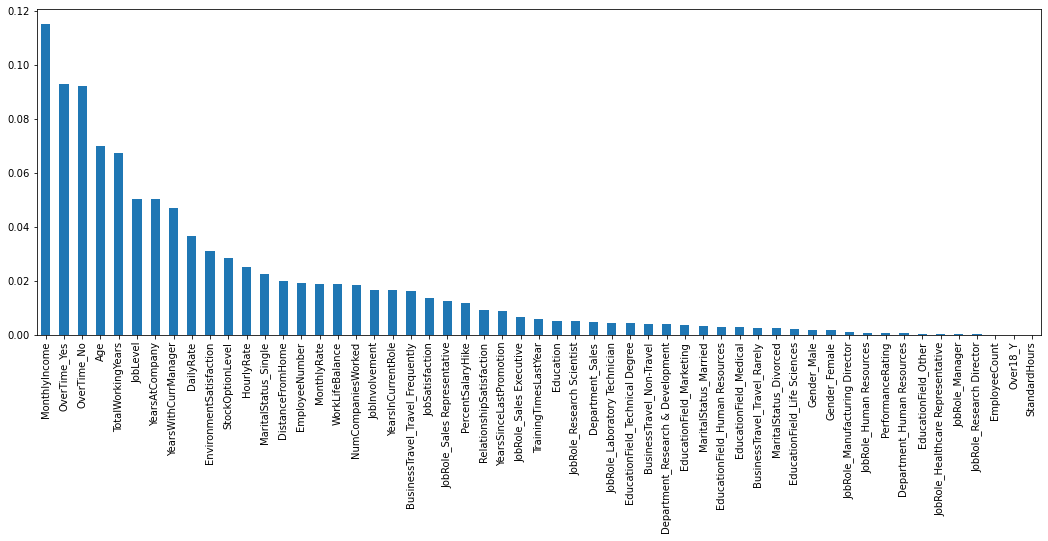

In [40]:
pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(18,6))

### Step8. [Visualize your RF Decision Tree using graphviz]

http://www.webgraphviz.com/. 

In [41]:
estim = rfc.estimators_[5]

In [42]:
from sklearn import tree
from sklearn.tree import export_graphviz
with open("RFDT.dot", 'w') as f:
    f = tree.export_graphviz(estim, out_file=f, max_depth=4, impurity=False, feature_names=X_train.columns.values, class_names=['yes','no'], rounded=True, proportion=False, precision=2, filled= True)

In [43]:
!dot -Tjpg RFDT.dot -o RF.jpg

'dot' is not recognized as an internal or external command,
operable program or batch file.


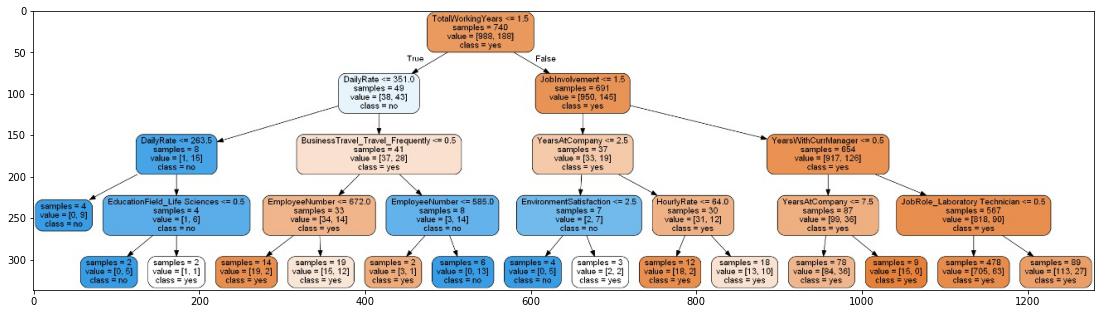

In [44]:
import matplotlib.pyplot as plt

image = plt.imread('RF.jpg')
plt.figure(figsize=(19,15))
plt.imshow(image)

### Step9. [RF with a range of trees] 
#### Fit random forest models with a range of tree numbers [15, 20, 30, 40, 50, 100, 150, 200, 300, 400] and print Out-Of-Bag error for each of these model. Use model.oob_score_ to get score and subtract this score from 1 to get the oob-error. That is, oob-error = 1 - model.oob_score_. 

Hint: since the only thing changing is the number of trees, the `warm_start` flag can be used so that the 
model just adds more trees to the existing model each time. Use the `set_params` method to update the 
number of trees. The following code many help to understand this part.


In [45]:
rf3 = RandomForestClassifier(oob_score=True,random_state=42,warm_start=True,n_jobs=-1)
oob_list = list()
# Iterate through all of the possibilities for number of trees

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    rf3.set_params(n_estimators=n_trees)
    rf3.fit(X_train, y_train)

    # Get the oob error

    oob_error = 1 - rf3.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

,oob
n_trees,
15.0,0.172012
20.0,0.163265
30.0,0.152575
40.0,0.151603
50.0,0.145773
100.0,0.147716
150.0,0.143829
200.0,0.149660
300.0,0.148688


### Step10. [Plot oob-error for each tree] 
The following lines will help you 

[Text(0, 0.5, 'out-of-bag error')]

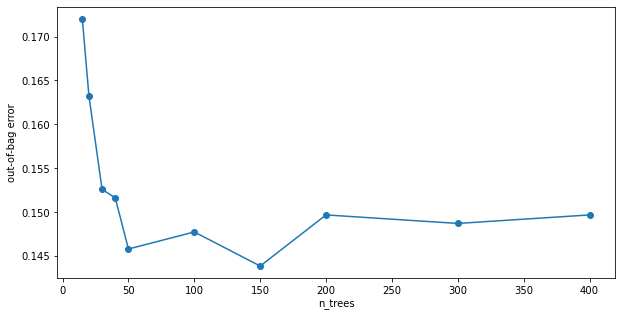

In [46]:
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(10,5))
ax.set(ylabel='out-of-bag error')

### Step11. [Compare with DecisionTreeClassifier] 
#### Create DecisionTreeClassifier, fit and predict on test set 

In [47]:
clf2 = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)

In [48]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [49]:
y_predict=clf2.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

#### Visualize the tree using graphviz 

In [50]:
!dot -Tjpg DTC2.dot -o DT.jpg

'dot' is not recognized as an internal or external command,
operable program or batch file.


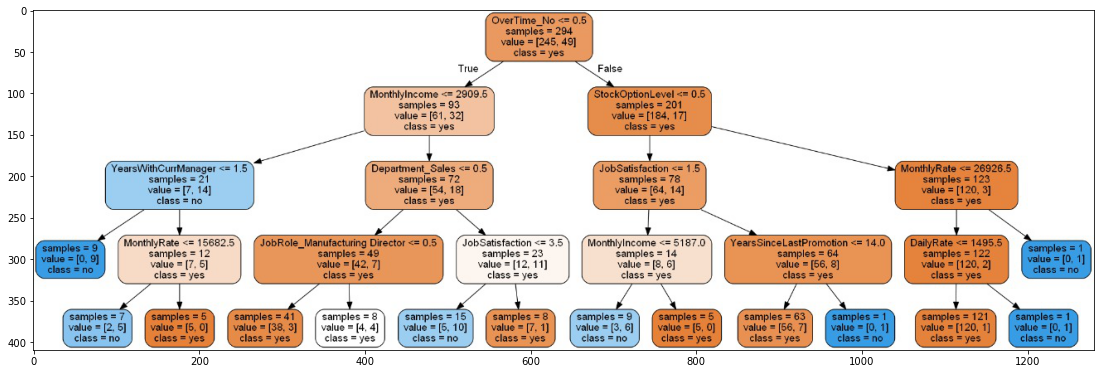

In [51]:
image = plt.imread('DT.jpg')
plt.figure(figsize=(19,15))
plt.imshow(image)

http://www.webgraphviz.com/. 

#### Print accuracy score 

In [52]:
accuracy_score(y_test,y_predict)

0.8480725623582767

#### Print classification report 

In [53]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       371
           1       0.53      0.39      0.45        70

    accuracy                           0.85       441
   macro avg       0.71      0.66      0.68       441
weighted avg       0.83      0.85      0.84       441



#### What is the result of the comparision between RF and DT models? Which gives best accuracy?. 
#### What is your comment on precision, recall, f1 score values? 

In [54]:
print("RF model:      ",accuracy_score(y_test,y_pred))
print("RF Precision:  ",precision_score(y_test,y_pred))
print("RF Recall:     ",recall_score(y_test,y_pred))
print("RF F1 score:   ",f1_score(y_test,y_pred))
print("\n")
print("DT model:      ",accuracy_score(y_test,y_predict))
print("DT Precision:  ",precision_score(y_test,y_predict))
print("DT Recall:     ",recall_score(y_test,y_predict))
print("DT F1 score:   ",f1_score(y_test,y_predict))

RF model:       0.8639455782312925
RF Precision:   0.8571428571428571
RF Recall:      0.17142857142857143
RF F1 score:    0.2857142857142857


DT model:       0.8480725623582767
DT Precision:   0.5294117647058824
DT Recall:      0.38571428571428573
DT F1 score:    0.4462809917355372
